R-group decomposition (RGD) is a standard approach for analyzing chemical datasets and doing SAR analysis.
Of course the RDKit provides code supporting RGD. Since there are a lot of different RGD use cases, and it turns out that doing R-group decomposition and providing *useful* results on arbitrary datasets is considerably more complicated than it may initially seem, the RDKit's RGD implementation needs to be quite flexible (and the implementation is fairly complex). Unfortunately the code is also quite "underdocumented"... this tutorial is a first pass at fixing that. It will eventually end up in the RDKit documentation.

Here I will demonstrate some of the more useful (in my opinion) options of the RGD code using some real-world datasets. I may revisit this topic at some point in the future to explain some of the more advanced topics. If there are pieces you think I should cover, please let me know in the comments!

Other RGD-related blog posts:

1. [R-Group Decomposition: Edge Cases](https://greglandrum.github.io/rdkit-blog/posts/2023-01-05-rgd-edge-cases.html)
2. [R-Group Decomposition and Highlighting](https://greglandrum.github.io/rdkit-blog/posts/2021-08-07-rgd-and-highlighting.html)
3. [R-group decomposition and molzip](http://localhost:4665/posts/2022-03-14-rgd-and-molzip.html)

You can also use the [rgd tag](https://greglandrum.github.io/rdkit-blog/#category=rgd) to find these.

The first two datasets I'll use in this post are created using the SMILES provided in the Supplementary Information from a couple of open-acess J Med Chem papers (Aside: isn't it great that J. Med. Chem. encourages authors to provide SMILES for the structures in their papers and so many authors actually do so? Isn't it depressing that the journals which focus on computational topics don't do so?).


In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)
import rdkit
print(rdkit.__version__)

2022.09.1


In [2]:
import os
baseDir = '../data/RGD_sets'

# The basics

Here's our first dataset, from https://pubs.acs.org/doi/10.1021/acs.jmedchem.8b00883


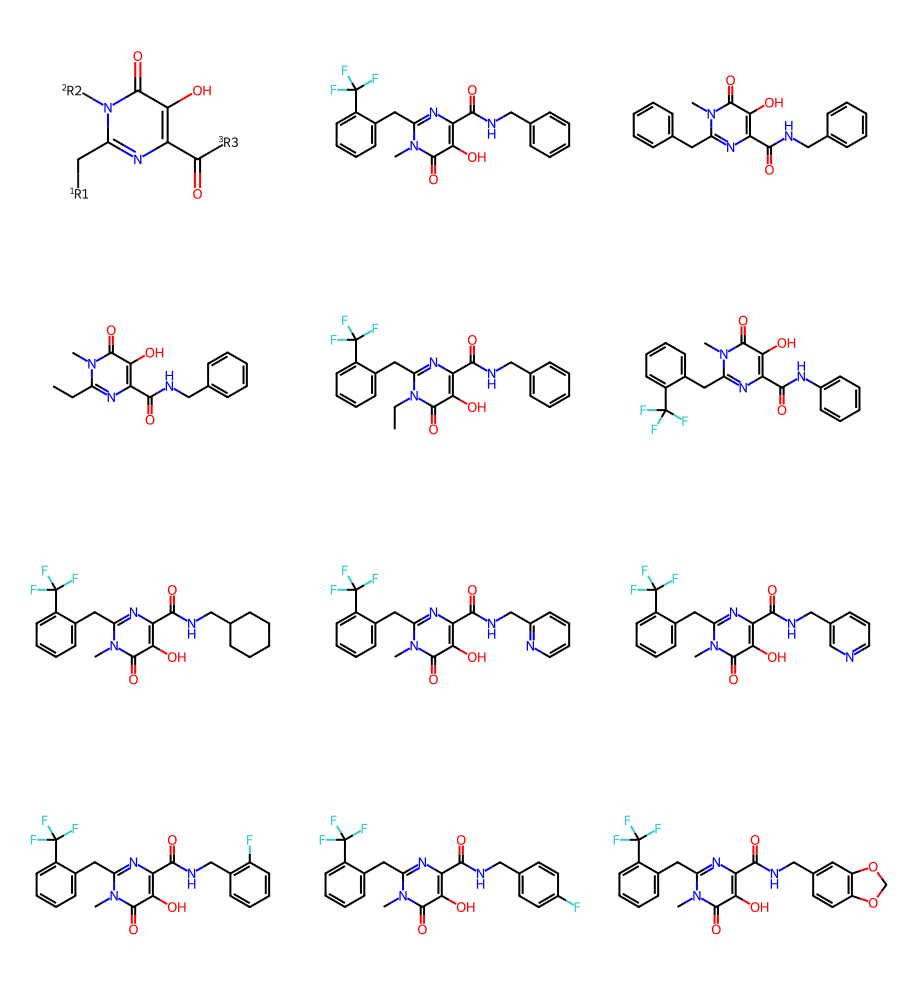

In [3]:
df = PandasTools.LoadSDF(os.path.join(baseDir,'jm8b00883.sdf'))
mols = df.ROMol.to_list()
Draw.MolsToGridImage(mols[:12],subImgSize=(300,250))

These datasets include the core query as the first element in the file (I added this, it was not in the original paper), so pull that out:

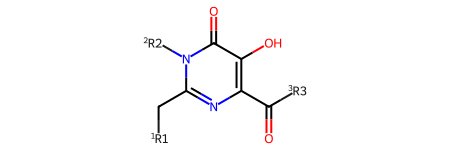

In [4]:
core = mols.pop(0)
core

Bring in the RGD module

In [5]:
from rdkit.Chem import rdRGroupDecomposition

Here's a quick demo of the basic usage of the RGD code. The return value is a 2-tuple:
 1. the RGD results
 2. a list with the indices of molecules which did not match any of the cores

In [6]:
rgd,fails = rdRGroupDecomposition.RGroupDecompose([core],mols)
fails

[14:15:53] No core matches


[15]

In this case the molecule at position 15 did not match our core:

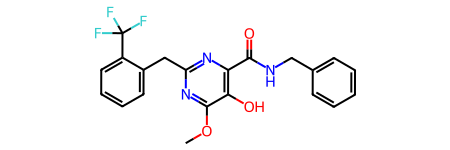

In [7]:
mols[15]

The output is a list with one entry per matching molecule. Each entry in the list is a dictionary with the core match and R groups for the corresponding molecule:

In [8]:
rgd[:2]

[{'Core': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeac00>,
  'R1': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeac70>,
  'R2': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeace0>,
  'R3': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aead50>,
  'R4': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeadc0>,
  'R5': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeae30>},
 {'Core': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeaea0>,
  'R1': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeaf10>,
  'R2': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeaf80>,
  'R3': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeaff0>,
  'R4': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeb060>,
  'R5': <rdkit.Chem.rdchem.Mol at 0x7fbeb7aeb0d0>}]

Let's look at the results from the first row:

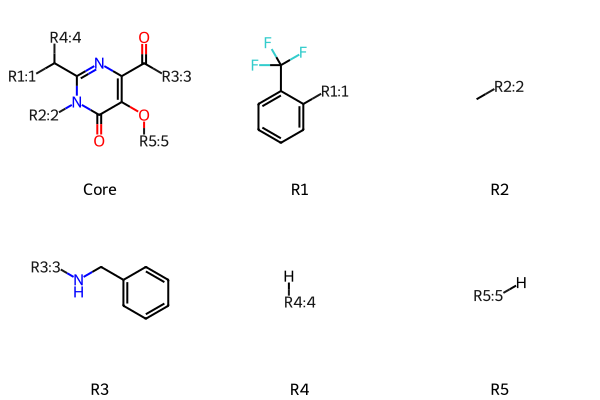

In [9]:
Draw.MolsToGridImage(rgd[0].values(),legends=rgd[0].keys())

If you want to quickly look at the results from the RGD, it can be convenient to just display them in a Pandas DataFrame. The `PandasTools` module includes a function to make this easy. The function, `RGroupDecompositionToFrame()`, needs the results from the RGD in a different format, which we can get by calling `RGroupDecompose()` with the keyword argument `asRows=False`:

[14:15:53] No core matches


,Mol,R1,R2,R3,R4,R5
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,

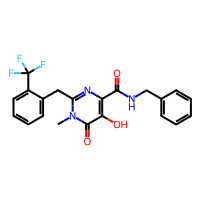
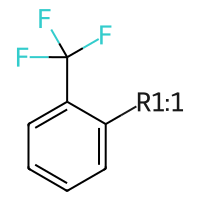
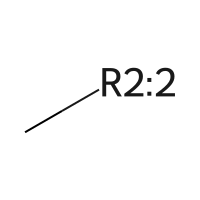
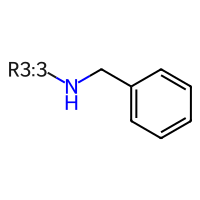
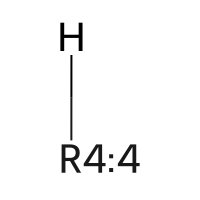
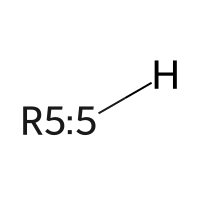
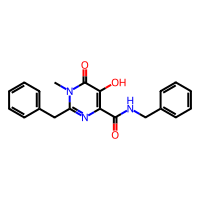
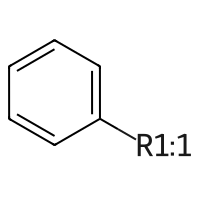
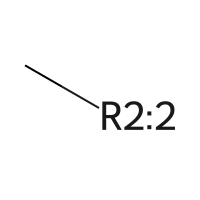
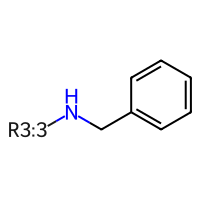
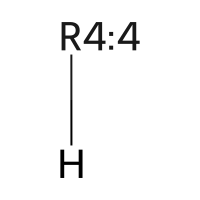
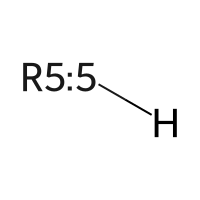
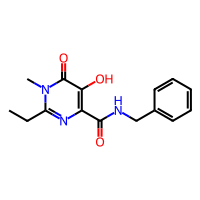
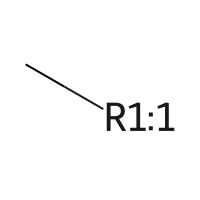
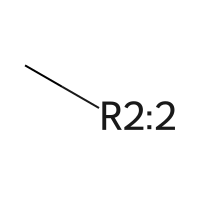
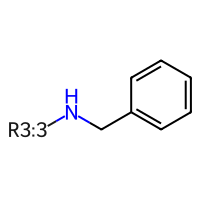
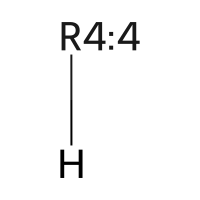
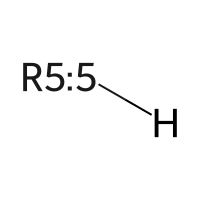
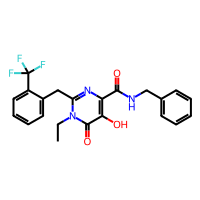
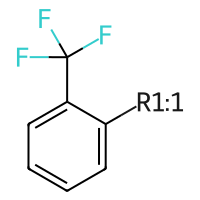
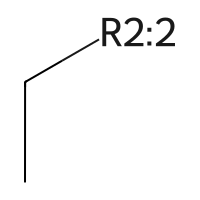
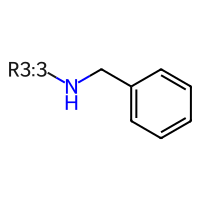
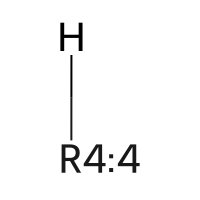
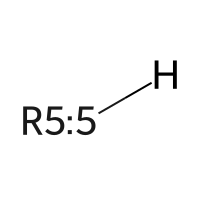
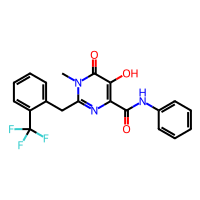
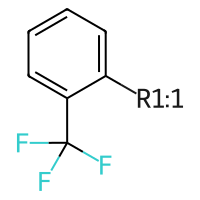
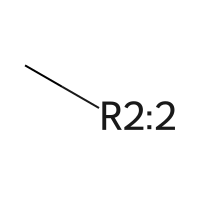
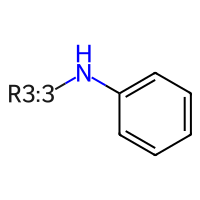
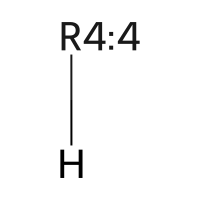
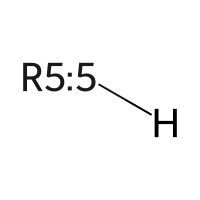

In [10]:
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core],mols,asRows=False)
PandasTools.RGroupDecompositionToFrame(crgd,[mols[i] for i in range(len(mols)) if i not in fails],).head()

When called this way, `RGroupDecompose()` returns a dictionary of lists instead of a list of dictionaries:

In [11]:
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core],mols,asRows=False)
crgd.keys()

[14:15:53] No core matches


dict_keys(['Core', 'R1', 'R2', 'R3', 'R4', 'R5'])

In [12]:
len(mols),len(crgd['Core']),len(crgd['R1'])

(18, 17, 17)

The core we provided has three labelled R groups, but the RGD produced five different R labels. The other labels were automatically assigned when molecules with additional substituents were encountered. This behavior can be disabled using the `onlyMatchAtRGroups` parameter when calling `RGroupDecompose`:

In [13]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.onlyMatchAtRGroups = True
rgd,fails = rdRGroupDecomposition.RGroupDecompose([core],mols,options = ps)
fails

[14:15:54] No core matches
[14:15:54] No core matches
[14:15:54] No core matches


[14, 15, 16]

Now there are three molecules which didn't match: 15 from before and then 14 and 16, which had additional substituents. The other molecules only have R1-R3:

In [14]:
rgd[0]

{'Core': <rdkit.Chem.rdchem.Mol at 0x7fbeb5a9e5e0>,
 'R1': <rdkit.Chem.rdchem.Mol at 0x7fbeb5a9e650>,
 'R2': <rdkit.Chem.rdchem.Mol at 0x7fbeb5a9e6c0>,
 'R3': <rdkit.Chem.rdchem.Mol at 0x7fbeb5a9e730>}

## Working without R labels

It's also possible to do RGD by providing a core without labeled R groups:

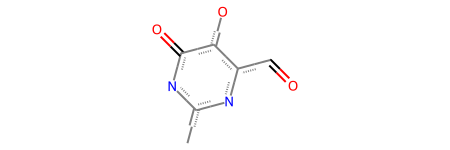

In [15]:
core_without_labels = Chem.MolFromSmarts('Cc1nc(=O)c(O)c(C=O)n1')
core_without_labels

1


[14:15:54] No core matches


,Mol,R1,R2,R3,R4
0,,,,,
1,,,,,
2,,,,,
3,,,,,
4,,,,,

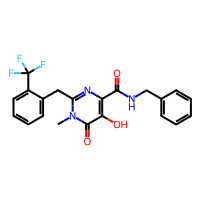
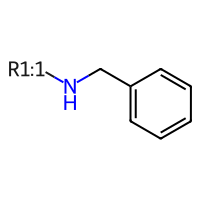
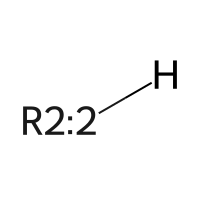
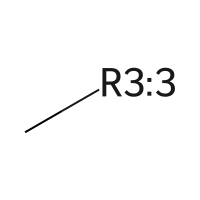
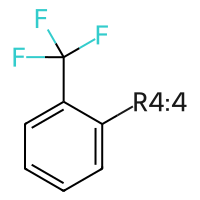
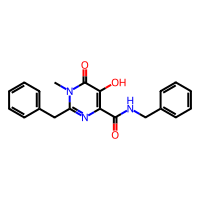
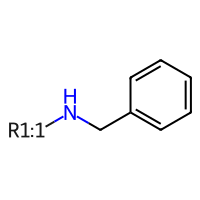
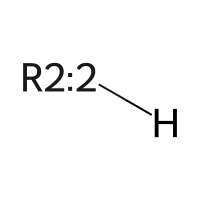
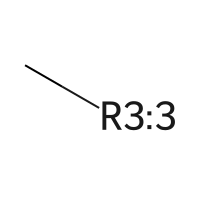
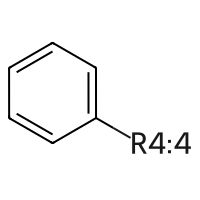
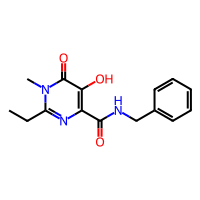
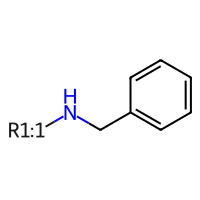
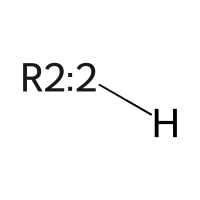
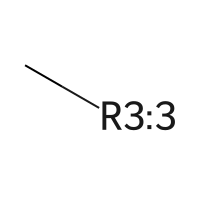
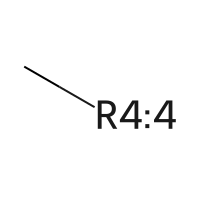
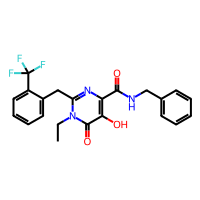
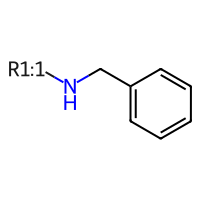
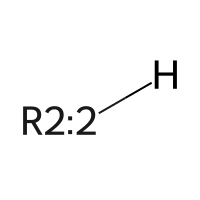
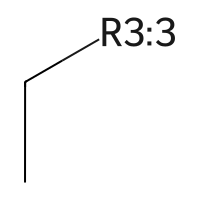
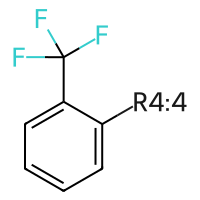
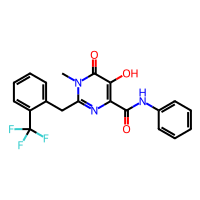
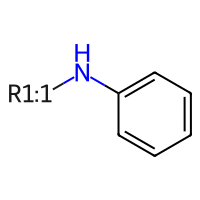
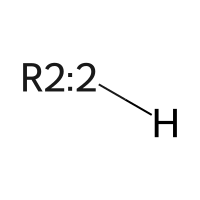
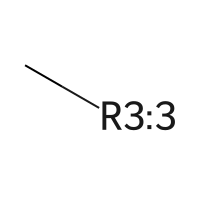
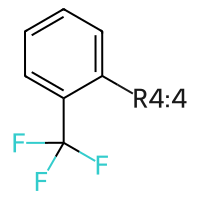

In [16]:
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core_without_labels],mols,asRows=False)
print(len(fails))
PandasTools.RGroupDecompositionToFrame(crgd,[mols[i] for i in range(len(mols)) if i not in fails],).head()

Here the R labels are automatically assigned, but the result is otherwise the same as what we saw above.

# Handing of chirality

For this we'll use a new dataset, from https://pubs.acs.org/doi/10.1021/acs.jmedchem.5b00752

Once again, I manually constructed the core when putting these datasets together.

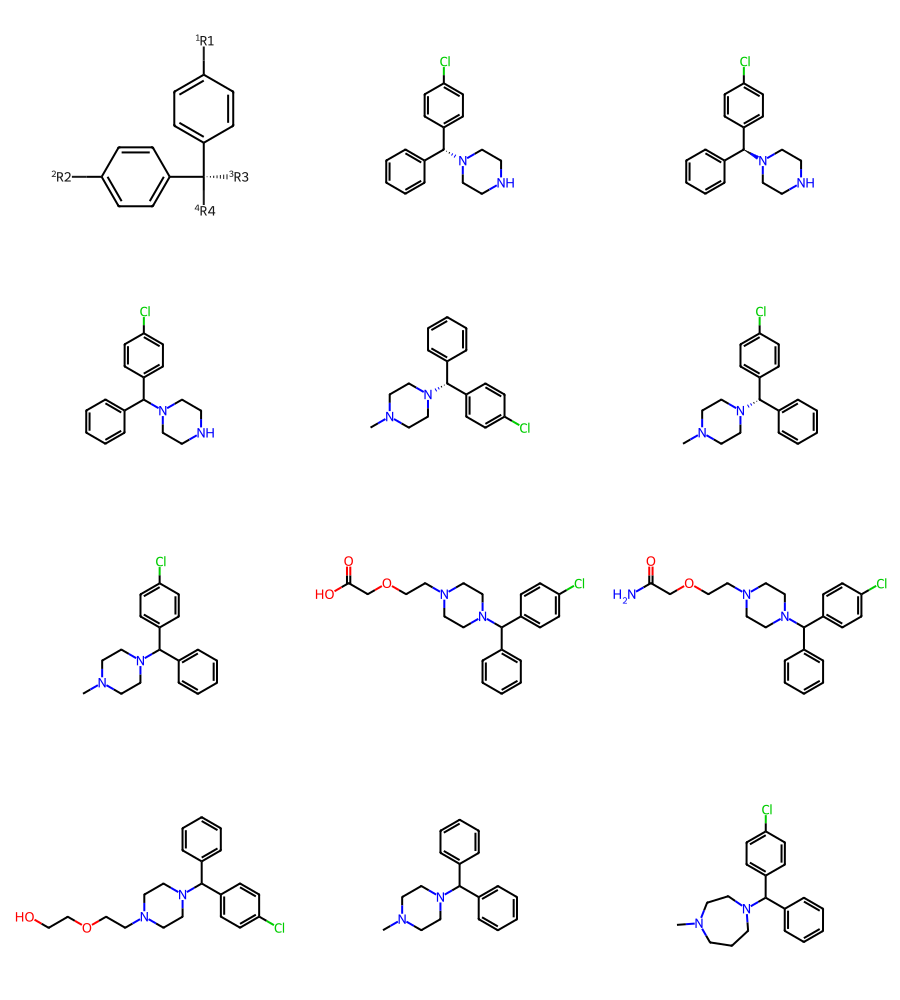

In [17]:
df = PandasTools.LoadSDF(os.path.join(baseDir,'jm5b00752.sdf'))
mols = df.ROMol.to_list()
Draw.MolsToGridImage(mols[:12],subImgSize=(300,250))

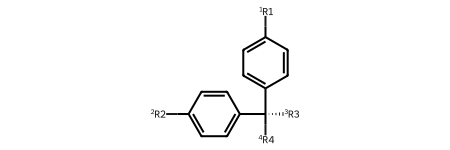

In [18]:
core = mols.pop(0)
core

In [19]:
from rdkit import RDLogger

In [20]:
RDLogger.DisableLog('rdApp.debug') # <- disables the "no core matches" message
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core],mols,asRows=False)
len(fails),len(mols)

(36, 59)

In this case there were 36 molecules in the SI which didn't match our core query.
Let's look at the ones which did:

,Mol,R1,R3,R4
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,

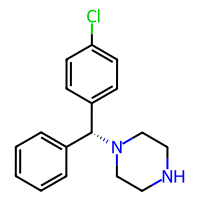
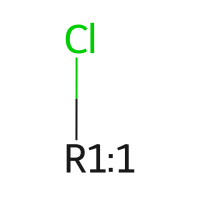
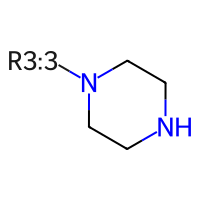
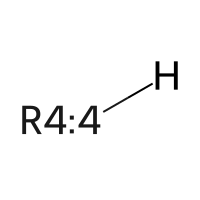
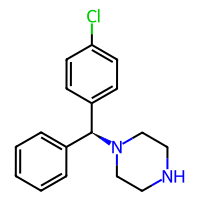
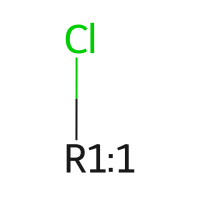
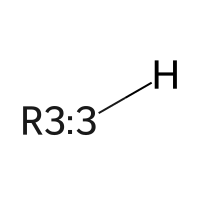
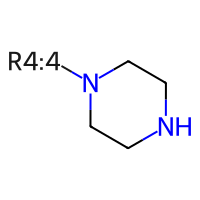
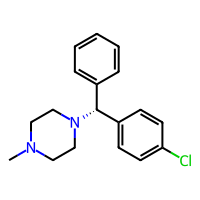
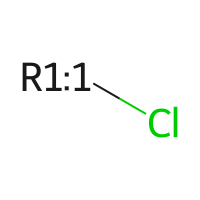
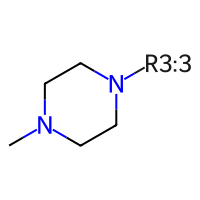
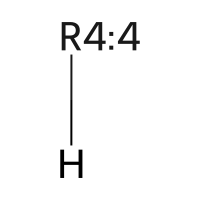
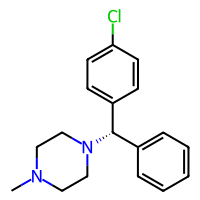
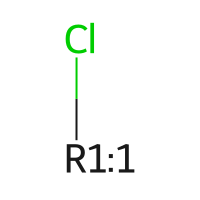
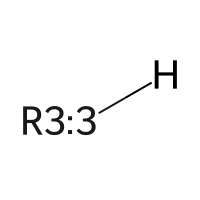
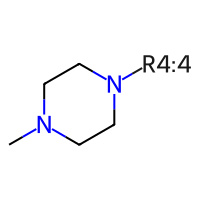
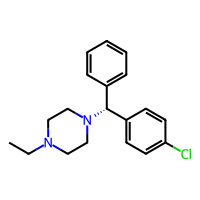
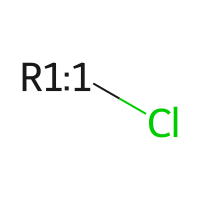
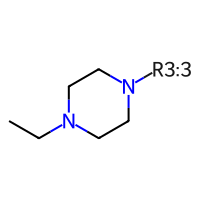
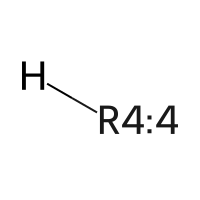

In [21]:
df = PandasTools.RGroupDecompositionToFrame(crgd,[mols[i] for i in range(len(mols)) if i not in fails])
df.head()

Notice that we have drawn the core with a wedged bond, indicating chirality.

What if we use a core without chirality indicated? One easy way to do this is to "turn off" the chirality flag directly:

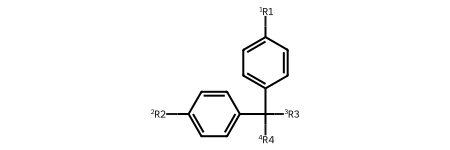

In [22]:
core_cp = Chem.Mol(core)
core_cp.GetAtomWithIdx(0).SetChiralTag(Chem.ChiralType.CHI_UNSPECIFIED)
core_cp

8


,Mol,R1,R2,R3,R5
0,,,,,
1,,,,,
2,,,,,
3,,,,,
4,,,,,

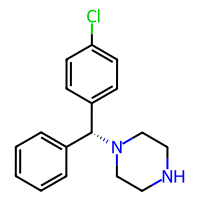
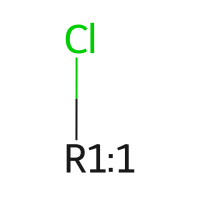
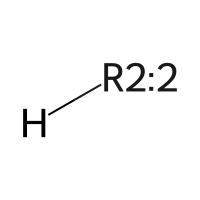
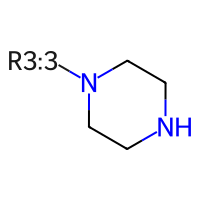
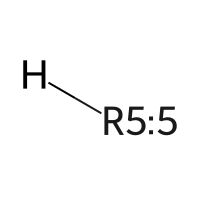
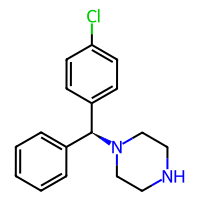
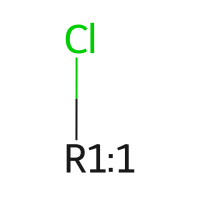
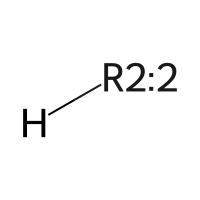
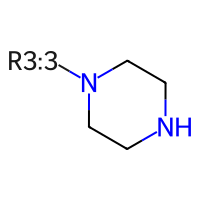
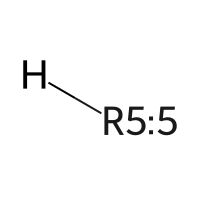
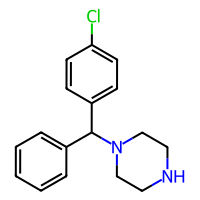
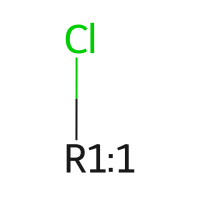
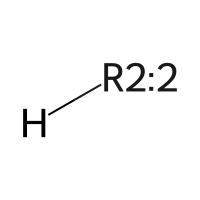
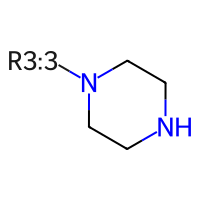
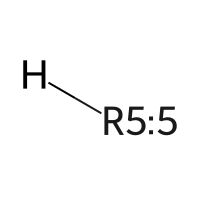
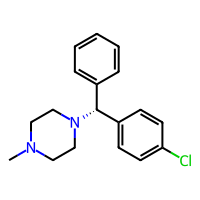
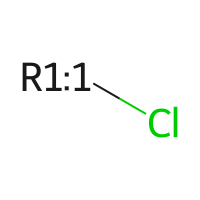
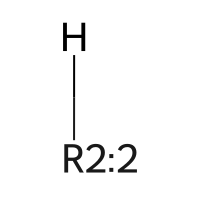
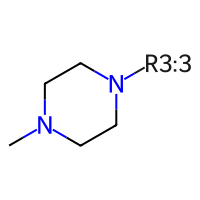
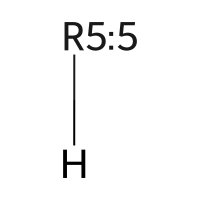
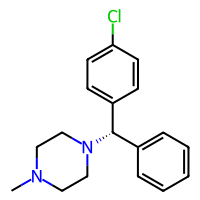
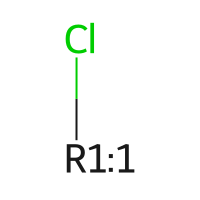
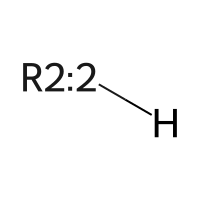
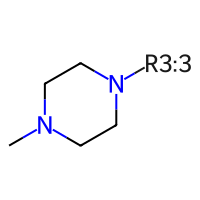
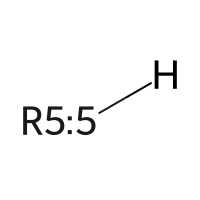

In [23]:
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core_cp],mols,asRows=False)
print(len(fails))
df = PandasTools.RGroupDecompositionToFrame(crgd,[mols[i] for i in range(len(mols)) if i not in fails])
df.head()

This time the usual R group symmetrization has been applied and we end up with the piperazines all in R3

It's also worth pointing out that this result set has a lot less failures - 8 instead of 36 with the original query. We can see one of the extra results in this excerpt from the results table: the third row is a molecule where chirality hasn't been specified for the central atom.

We can accomplish the same thing without actually modifying the core itself by telling the RGD code to ignore chirality when doing its substructure search.

In the interest of not having this post contain gigabytes of images, here I'm just showing the results as SMILES:

In [24]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.substructMatchParams.useChirality=False
rgd,fails = rdRGroupDecomposition.RGroupDecompose([core],mols,asRows=True,asSmiles=True,options=ps)
print(len(fails))
for row in rgd[:5]:
    row.pop('Core')
    print(row)

8
{'R1': 'Cl[*:1]', 'R2': '[H][*:2]', 'R3': 'C1CN([*:3])CCN1', 'R5': '[H][*:5]'}
{'R1': 'Cl[*:1]', 'R2': '[H][*:2]', 'R3': 'C1CN([*:3])CCN1', 'R5': '[H][*:5]'}
{'R1': 'Cl[*:1]', 'R2': '[H][*:2]', 'R3': 'C1CN([*:3])CCN1', 'R5': '[H][*:5]'}
{'R1': 'Cl[*:1]', 'R2': '[H][*:2]', 'R3': 'CN1CCN([*:3])CC1', 'R5': '[H][*:5]'}
{'R1': 'Cl[*:1]', 'R2': '[H][*:2]', 'R3': 'CN1CCN([*:3])CC1', 'R5': '[H][*:5]'}


These are the same results as we saw before.

# Using multiple cores

Here I'm using a couple of datasets from ChEMBL31.

first set: 49
both sets: 82


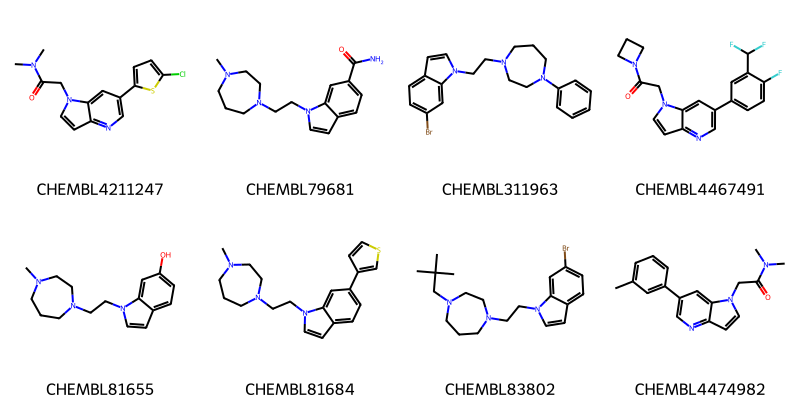

In [25]:
doc_CHEMBL1135860_smiles='''chembl_id smiles
CHEMBL69257 O=C1Nc2cccc3c2C1(CCCCN1CC=C(c2ccccc2)CC1)CCC3
CHEMBL28056 Cc1cccc(C#N)c1-c1cccc2c1-c1cccc3c1[C@@H](C2)N(C)CC3
CHEMBL84270 Brc1ccc2ccn(CCN3CCN4CCCCC4C3)c2c1
CHEMBL79957 CC1CN(CCn2ccc3ccc(Br)cc32)CCN1
CHEMBL309994 CN1CCCN(CCn2ccc3ccc(-c4cccnc4)cc32)CC1
CHEMBL439946 CN1CCCN(CCn2ccc3ccc(C(C)(C)O)cc32)CC1
CHEMBL310317 C=C(C)c1ccc2ccn(CCN3CCCN(C)CC3)c2c1
CHEMBL83090 CC(C)c1ccc2ccn(CCN3CCCN(C)CC3)c2c1
CHEMBL419101 CCc1ccc2ccn(CCN3CCCN(C)CC3)c2c1
CHEMBL312720 Cc1ccc2ccn(CCN3CCCN(C)CC3)c2c1
CHEMBL82708 C#Cc1ccc2ccn(CCN3CCCN(C)CC3)c2c1
CHEMBL81576 C=Cc1ccc2ccn(CCN3CCCN(C)CC3)c2c1
CHEMBL81449 COc1ccc2ccn(CCN3CCCN(C)CC3)c2c1
CHEMBL310594 Brc1ccc2ccn(CCN3CCCN(C4CCCCC4)CC3)c2c1
CHEMBL81022 Brc1ccc2ccn(CCN3CCCN(C4CCCC4)CC3)c2c1
CHEMBL309523 Brc1ccc2ccn(CCN3CCCN(C4CC4)CC3)c2c1
CHEMBL433134 Brc1ccc2ccn(CCN3CCCN(CC4CC4)CC3)c2c1
CHEMBL83802 CC(C)(C)CN1CCCN(CCn2ccc3ccc(Br)cc32)CC1
CHEMBL81488 CC(C)CN1CCCN(CCn2ccc3ccc(Br)cc32)CC1
CHEMBL81784 CC(C)N1CCCN(CCn2ccc3ccc(Br)cc32)CC1
CHEMBL83328 Brc1ccc2ccn(CCN3CCCNCC3)c2c1
CHEMBL81684 CN1CCCN(CCn2ccc3ccc(-c4ccsc4)cc32)CC1
CHEMBL82550 CN1CCCN(CCn2ccc3ccc(OCc4ccccc4)cc32)CC1
CHEMBL78977 CN1CCCN(CCn2ccc3ccc([N+](=O)[O-])cc32)CC1
CHEMBL312489 CN1CCCN(CCn2ccc3ccc(C(F)(F)F)cc32)CC1
CHEMBL79681 CN1CCCN(CCn2ccc3ccc(C(N)=O)cc32)CC1
CHEMBL81655 CN1CCCN(CCn2ccc3ccc(O)cc32)CC1
CHEMBL310341 CN1CCCN(CCn2ccc3ccc(N)cc32)CC1
CHEMBL312049 CN1CCCN(CCn2ccc3ccc(Cl)cc32)CC1
CHEMBL309908 CN1CCCN(CCn2ccc3ccc(F)cc32)CC1
CHEMBL81394 Brc1cccc2ccn(CCN3CCN4CCCCC4C3)c12
CHEMBL81069 Brc1ccc2c(ccn2CCN2CCN3CCCCC3C2)c1
CHEMBL81527 Brc1cccc2c1ccn2CCN1CCN2CCCCC2C1
CHEMBL309750 Brc1ccc2ccn(CCN3CCCN4CCCCC4C3)c2c1
CHEMBL311587 Brc1ccc2ccn(CCN3CCC4CCCCN4CC3)c2c1
CHEMBL81424 CN1CCCN(CCn2ccc3ccc(Br)cc32)CC1
CHEMBL79585 Brc1ccc2ccn(CCN3CCN4CCCC4C3)c2c1
CHEMBL310187 CC1CN(CCn2ccc3ccc(Br)cc32)CC(C)N1
CHEMBL81276 FC(F)(F)c1ccc2ccn(CCN3CCCN4CCCCC4C3)c2c1
CHEMBL81607 Clc1ccc2ccn(CCN3CCCN4CCCCC4C3)c2c1
CHEMBL310552 CN1CCCN(CCn2ccc3cccc(Br)c32)CC1
CHEMBL81041 CN1CCCN(CCn2ccc3cc(Br)ccc32)CC1
CHEMBL310386 CN1CCCN(CCn2ccc3c(Br)cccc32)CC1
CHEMBL78942 Brc1ccc2ccn(CCN3CCN(C4CCCCC4)CC3)c2c1
CHEMBL311963 Brc1ccc2ccn(CCN3CCCN(c4ccccc4)CC3)c2c1
CHEMBL81792 Brc1ccc2ccn(CCN3CCNCC3)c2c1
CHEMBL419646 C[C@H](Nc1nc(N)nc(NC[C@H]2C[C@@H]2c2ccc(F)cc2)n1)c1ccccc1
CHEMBL282199 CC1CCN(CC[C@H]2CCCN2S(=O)(=O)c2cccc(O)c2)CC1
CHEMBL12264 Cc1cccc(S(=O)(=O)N(C)[C@H](C)CCN2CCC(C)CC2)c1
'''
doc_CHEMBL4339196_smiles='''chembl_id smiles
CHEMBL4211247 CN(C)C(=O)Cn1ccc2ncc(-c3ccc(Cl)s3)cc21
CHEMBL4529074 Cc1cc(-c2cnc3ccn(CC(=O)N(C)C)c3c2)sc1Cl
CHEMBL4443868 Cc1cc(-c2cnc3ccn(CC(=O)N4CCC4)c3c2)ccc1F
CHEMBL4588774 Cc1cc(-c2cnc3ccn(CC(=O)N4CCCCC4)c3c2)ccc1F
CHEMBL4550955 Cc1cc(-c2cnc3ccn(CC(=O)N4CCCC4)c3c2)ccc1F
CHEMBL4445829 Cc1cc(-c2cnc3ccn(CC(=O)N4CC(F)C4)c3c2)ccc1F
CHEMBL4302264 Cc1cc(-c2cnc3ccn(CC(=O)N(C)C)c3c2)ccc1F
CHEMBL4539619 Cc1cc(-c2cnc3ccn(Cc4ccccn4)c3c2)ccc1F
CHEMBL4590530 Cc1nnc(Cn2ccc3ncc(-c4ccc(F)c(C)c4)cc32)o1
CHEMBL4471014 Cc1noc(Cn2ccc3ncc(-c4ccc(F)c(C)c4)cc32)n1
CHEMBL4526512 Cc1cc(-c2cnc3ccn(Cc4ncco4)c3c2)ccc1F
CHEMBL4446706 Cc1cc(-c2cnc3ccn(CC4CCOC4)c3c2)ccc1F
CHEMBL4537967 Cc1cc(-c2cnc3ccn(CC4CCC4)c3c2)ccc1F
CHEMBL4464756 Cc1cc(-c2cnc3ccn(CC(O)C4CC4)c3c2)ccc1F
CHEMBL4462496 CN(C)C(=O)Cn1ccc2ncc(-c3ccc(C(F)(F)F)cc3)cc21
CHEMBL4571666 CN(C)C(=O)Cn1ccc2ncc(-c3cccc(C(F)(F)F)c3)cc21
CHEMBL4515350 O=C(Cn1ccc2ncc(-c3cccc(C(F)(F)F)c3)cc21)N1CCC1
CHEMBL4463483 CN(C)C(=O)Cn1ccc2ncc(-c3ccccc3C(F)(F)F)cc21
CHEMBL4462073 CN(C)C(=O)Cn1ccc2ncc(-c3cccc(C(F)(F)F)n3)cc21
CHEMBL4442512 CN(C)C(=O)Cn1ccc2ncc(-c3cncc(C(F)(F)F)c3)cc21
CHEMBL4513602 CN(C)C(=O)Cn1ccc2ncc(-c3ccnc(C(F)(F)F)c3)cc21
CHEMBL4451099 CN(C)C(=O)Cn1ccc2ncc(-c3cccc(Cl)c3)cc21
CHEMBL4474982 Cc1cccc(-c2cnc3ccn(CC(=O)N(C)C)c3c2)c1
CHEMBL4593473 CN(C)C(=O)Cn1ccc2ncc(-c3ccc(F)c(Cl)c3)cc21
CHEMBL4547576 CN(C)C(=O)Cn1ccc2ncc(-c3ccc(F)c(C(F)F)c3)cc21
CHEMBL4467491 O=C(Cn1ccc2ncc(-c3ccc(F)c(C(F)F)c3)cc21)N1CCC1
CHEMBL4591770 CN(C)C(=O)Cn1ccc2ncc(-c3ccc(F)c(F)c3)cc21
CHEMBL4531750 CN(C)C(=O)Cn1ccc2ncc(-c3ccc(C(F)(F)F)s3)cc21
CHEMBL4575739 Cc1ccc(-c2cnc3ccn(CC(=O)N(C)C)c3c2)s1
CHEMBL4529810 Cc1csc(-c2cnc3ccn(CC(=O)N(C)C)c3c2)c1
CHEMBL4451514 Cc1cc(-c2cnc3ccn(CC(=O)N(C)C)c3c2)ccc1Cl
CHEMBL4460335 O=C(Cn1c(=O)[nH]c2ncc(-c3cccc(C(F)(F)F)c3)cc21)NC1CC1
CHEMBL4475155 O=C(Cn1ccc2ncc(-c3cccc(C(F)(F)F)c3)cc21)NC1CC1
'''
suppl1 = Chem.SmilesMolSupplier()
suppl1.SetData(doc_CHEMBL1135860_smiles,smilesColumn=1,nameColumn=0)
chembl_mols = [x for x in suppl1]
print(f'first set: {len(chembl_mols)}')
suppl1.SetData(doc_CHEMBL4339196_smiles,smilesColumn=1,nameColumn=0)
chembl_mols.extend(x for x in suppl1)
print(f'both sets: {len(chembl_mols)}')

import random
random.seed(0x1234)
random.shuffle(chembl_mols)
Draw.MolsToGridImage(chembl_mols[:8],legends=[x.GetProp('_Name') for x in chembl_mols],molsPerRow=4)


Here are the two core structures we'll use with these molecules:

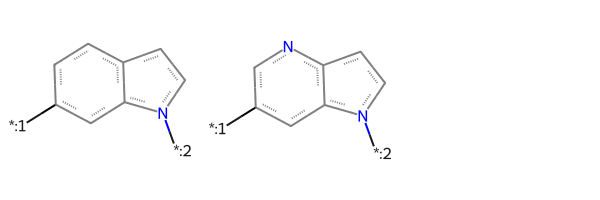

In [26]:
core1 = Chem.MolFromSmarts('[*:1]-c1ccc2ccn(-[*:2])c2c1')
core2 = Chem.MolFromSmarts('[*:1]-c1cnc2ccn(-[*:2])c2c1')
Draw.MolsToGridImage([core1,core2])

Look at how many failures we get if we use the cores individually:

In [27]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.onlyMatchAtRGroups = True
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core1],chembl_mols,options=ps,asRows=False)
print(len(fails))
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core2],chembl_mols,options=ps,asRows=False)
print(len(fails))


44
50


But we can provide both cores:

12


,Mol,R1,R2
0,,,
1,,,
2,,,
3,,,
4,,,

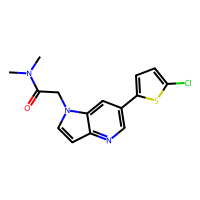
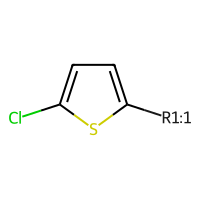
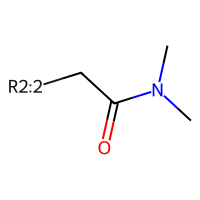
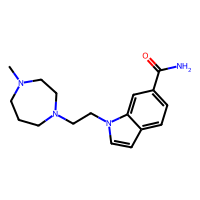
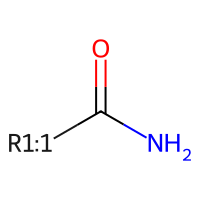
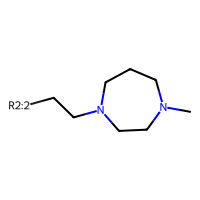
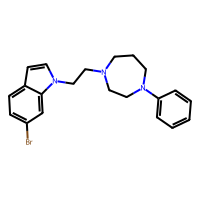
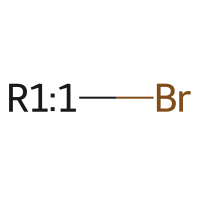
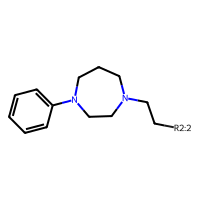
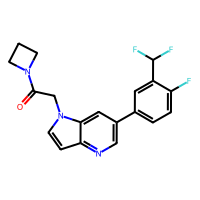
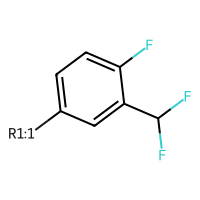
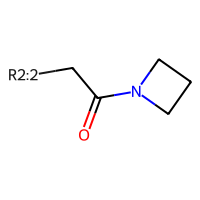
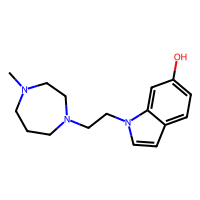
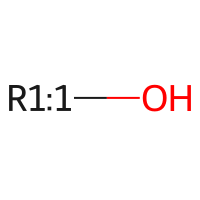
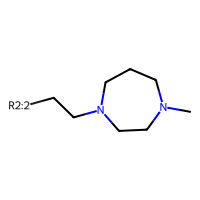

In [28]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.onlyMatchAtRGroups = True
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core1,core2],chembl_mols,options=ps,asRows=False)
print(len(fails))
df = PandasTools.RGroupDecompositionToFrame(crgd,[chembl_mols[i] for i in range(len(chembl_mols)) if i not in fails])
df.head()

Note that we can accomplish the same thing in this case by including a query feature in the core:

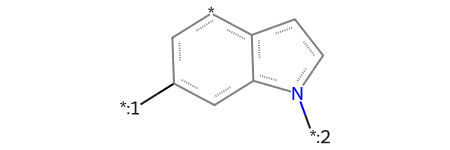

In [29]:
core3 = Chem.MolFromSmarts('[*:1]-c1c*c2ccn(-[*:2])c2c1')
core3

In [30]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.onlyMatchAtRGroups = True
rgd,fails = rdRGroupDecomposition.RGroupDecompose([core3],chembl_mols,options=ps,asRows=True,asSmiles=True)
print(len(fails))
rgd[:5]

12


[{'Core': 'c1nc2ccn([*:2])c2cc1[*:1]',
  'R1': 'Clc1ccc([*:1])s1',
  'R2': 'CN(C)C(=O)C[*:2]'},
 {'Core': 'c1cc2ccn([*:2])c2cc1[*:1]',
  'R1': 'NC(=O)[*:1]',
  'R2': 'CN1CCCN(CC[*:2])CC1'},
 {'Core': 'c1cc2ccn([*:2])c2cc1[*:1]',
  'R1': 'Br[*:1]',
  'R2': 'c1ccc(N2CCCN(CC[*:2])CC2)cc1'},
 {'Core': 'c1nc2ccn([*:2])c2cc1[*:1]',
  'R1': 'Fc1ccc([*:1])cc1C(F)F',
  'R2': 'O=C(C[*:2])N1CCC1'},
 {'Core': 'c1cc2ccn([*:2])c2cc1[*:1]',
  'R1': 'O[*:1]',
  'R2': 'CN1CCCN(CC[*:2])CC1'}]

This doesn't work when the different cores include different numbers of atoms; in those cases we'd need to provide multiple cores.

# Multiple attachments

For this one we'll use an artificial dataset

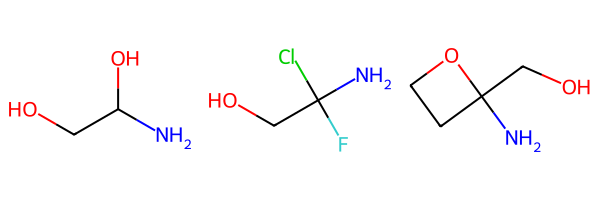

In [31]:
simple_ms = [Chem.MolFromSmiles(smi) for smi in ('NC(O)CO','NC(F)(Cl)CO','NC1(CCO1)CO')]
Draw.MolsToGridImage(simple_ms)

And we'll use a core without R group labels:

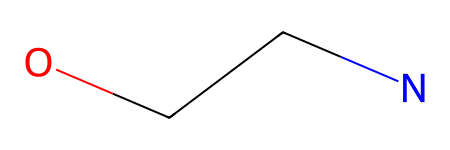

In [32]:
core = Chem.MolFromSmarts('N-C-C-O')
core

In [33]:
rgd,fails = rdRGroupDecomposition.RGroupDecompose([core],simple_ms,asRows=True,asSmiles=True)
print(len(fails))
rgd

0


[{'Core': 'NC(CO)[*:1]', 'R1': 'O[*:1]'},
 {'Core': 'NC(CO)[*:1]', 'R1': 'Cl[*:1].F[*:1]'},
 {'Core': 'NC(CO)[*:1]', 'R1': 'C(C[*:1])O[*:1]'}]

Let's look at those in a data frame:

,Mol,R1
0,,
1,,
2,,

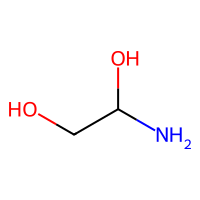
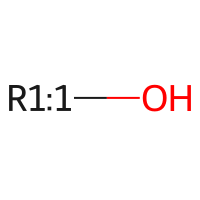
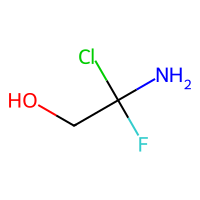
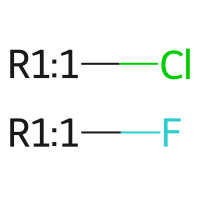
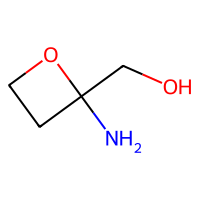
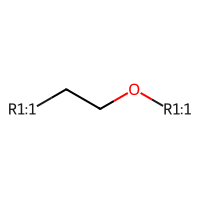

In [34]:
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core],simple_ms,asRows=False)
PandasTools.RGroupDecompositionToFrame(crgd,simple_ms)

The second and third molecule show how multiple attachments to a single non-labelled atom in the core are handled.

If you are working with cores where you allow R groups at unlabelled points and would rather not have two groups combined into a single group like this, you can disable the behavior:

,Mol,R1,R2
0,,,
1,,,
2,,,

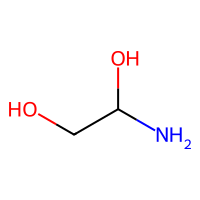
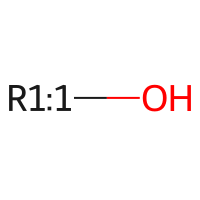
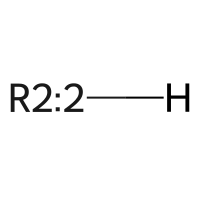
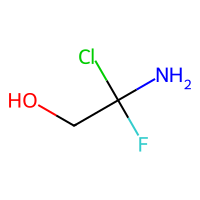
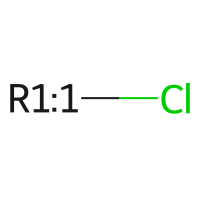
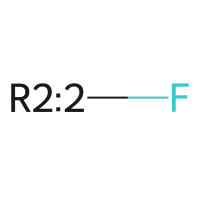
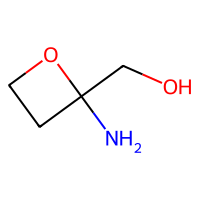
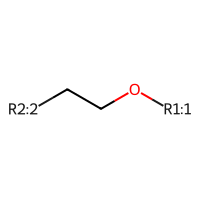
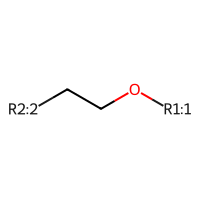

In [35]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.allowMultipleRGroupsOnUnlabelled = True
crgd,fails = rdRGroupDecomposition.RGroupDecompose([core],simple_ms,options=ps,asRows=False)
PandasTools.RGroupDecompositionToFrame(crgd,simple_ms)

This does result in the cyclic sidechain of the third molecule appearing twice; that seems a bit strange, but that's the most consistent behavior we could come up with.